# Wrangling Presidential Data for Visualisation

In [269]:
#Dependency Installation & Loading
install.packages("zoo")
install.packages("cowplot")
install.packages("viridis")

# Colourblind Palette Library ❤️ Viridis!
# Docs: [# Docs: [https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html#the-color-scales]]
library(viridis)

library(tidyverse)
library(cowplot)
library(lubridate)
library(zoo)

#Set Environment Plot Size:
options(repr.plot.width=25, repr.plot.height=10)

#Define my Own Theme                           
my_Theme <- theme(plot.title = element_text(face="bold",size=40),
                  plot.subtitle = element_text(face="italic", size = 20),
                  axis.title = element_text(face="bold",size=20),
                  axis.text = element_text(size=20),
                  plot.caption = element_text(size = 16),
                  legend.title = element_text(size = 16),
                  legend.text  = element_text(size = 14))


The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2FvCYm/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2FvCYm/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2FvCYm/downloaded_packages


## Import DataSet

In [270]:
dfsource<-"./data/POTUS_approval.csv"
polls <- read.csv(dfsource, stringsAsFactors = F)
head(polls)

,President,Start.Date,End.Date,Approving,Disapproving,Unsure.NoData
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Barack Obama,16/01/2017,19/01/2017,59,37,4
2,Barack Obama,09/01/2017,15/01/2017,57,39,4
3,Barack Obama,02/01/2017,08/01/2017,55,42,3
4,Barack Obama,26/12/2016,01/01/2017,55,40,5
5,Barack Obama,19/12/2016,25/12/2016,56,40,4
6,Barack Obama,12/12/2016,18/12/2016,56,40,4


## Format Column Names

In [271]:
polls<-polls %>% 
  rename(
    Date = Start.Date,
    EndDate = End.Date,
    Approve = Approving,
    Disapprove = Disapproving
    )

## Format Dates Properly

In [272]:
polls$Date<-dmy(polls$Date) # Formats the date

str(polls)

'data.frame':	1305 obs. of  6 variables:
 $ President    : chr  "Barack Obama" "Barack Obama" "Barack Obama" "Barack Obama" ...
 $ Date         : Date, format: "2017-01-16" "2017-01-09" ...
 $ EndDate      : chr  "19/01/2017" "15/01/2017" "08/01/2017" "01/01/2017" ...
 $ Approve      : int  59 57 55 55 56 56 57 54 56 56 ...
 $ Disapprove   : int  37 39 42 40 40 40 40 43 40 41 ...
 $ Unsure.NoData: int  4 4 3 5 4 4 3 3 4 3 ...


## Sample Query: 
Let's see what Trump's approval rate was on different dates 

In [273]:
TrumpApprove <- polls %>% 
  select(President, Date, Approve) %>%
  filter (President == "Donald Trump")

In [274]:
glimpse(TrumpApprove)

Rows: 141
Columns: 3
$ President <chr> "Donald Trump", "Donald Trump", "Donald Trump", "Donald Tru…
$ Date      <date> 2021-01-04, 2020-12-01, 2020-11-05, 2020-10-16, 2020-09-30…
$ Approve   <int> 34, 39, 43, 46, 43, 46, 42, 42, 41, 38, 39, 49, 49, 43, 49,…


## Aggregation - GroupBy(), Mean(), Median()

grouping is done using group_by(variable)

Summarising functions include mean(), median()

Display the mean approval percentage for each president over all polls taken during their presidency.

## Drop NA Value Rows

In [275]:
nrow(polls)
polls <- drop_na(polls)
nrow(polls)

[1] 1305

[1] 1305

In [276]:
#To extract  as vector 
Avgpolls <- polls%>% 
    group_by(President) %>%
    summarise(MeanApproval = mean(Approve)) 
Avgpolls

,President,MeanApproval
,<chr>,<dbl>
1,Barack Obama,47.96890
2,Donald Trump,40.38298
3,George Bush,61.41593
4,George W. Bush,51.34752
5,Ronald Reagan,52.23704
6,William J. Clinton,55.49074


## Use pull to select one column

In [277]:
Avgpolls %>% pull(MeanApproval)

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

In [278]:
Avgpolls$MeanApproval

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

## Getting moving averages

This is an average over a time frame time.  For this, we need the lubridate package

## Isolate Trump Polls (Select Columns, Filter By President, Arrange By Date)

In [279]:
TrumpPolls <-polls %>%
    select(President, Date, Approve, Disapprove) %>%
    filter (President == "Donald Trump") %>%
  arrange(Date) 
head(TrumpPolls)

,President,Date,Approve,Disapprove
,<chr>,<date>,<int>,<int>
1,Donald Trump,2017-01-20,45,47
2,Donald Trump,2017-01-30,43,52
3,Donald Trump,2017-02-06,41,53
4,Donald Trump,2017-02-13,40,54
5,Donald Trump,2017-02-20,42,53
6,Donald Trump,2017-02-27,43,51


## Mutate Dataframe into New Dataframe, Blocking Data into 10 Day Rolling Averages 

In [280]:
TrumpApprove<-TrumpPolls %>%
    mutate(AvgApprove = rollmean(Approve, 10, fill = NA, align="right"))

head(TrumpApprove)
summary(TrumpApprove$Approve)
summary(TrumpApprove$Disapprove)

,President,Date,Approve,Disapprove,AvgApprove
,<chr>,<date>,<int>,<int>,<dbl>
1,Donald Trump,2017-01-20,45,47,NA
2,Donald Trump,2017-01-30,43,52,NA
3,Donald Trump,2017-02-06,41,53,NA
4,Donald Trump,2017-02-13,40,54,NA
5,Donald Trump,2017-02-20,42,53,NA
6,Donald Trump,2017-02-27,43,51,NA


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   38.00   40.00   40.38   42.00   49.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.00   53.00   55.00   54.91   57.00   62.00 

Plotting a line chart of Trump's rolling average approval

Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


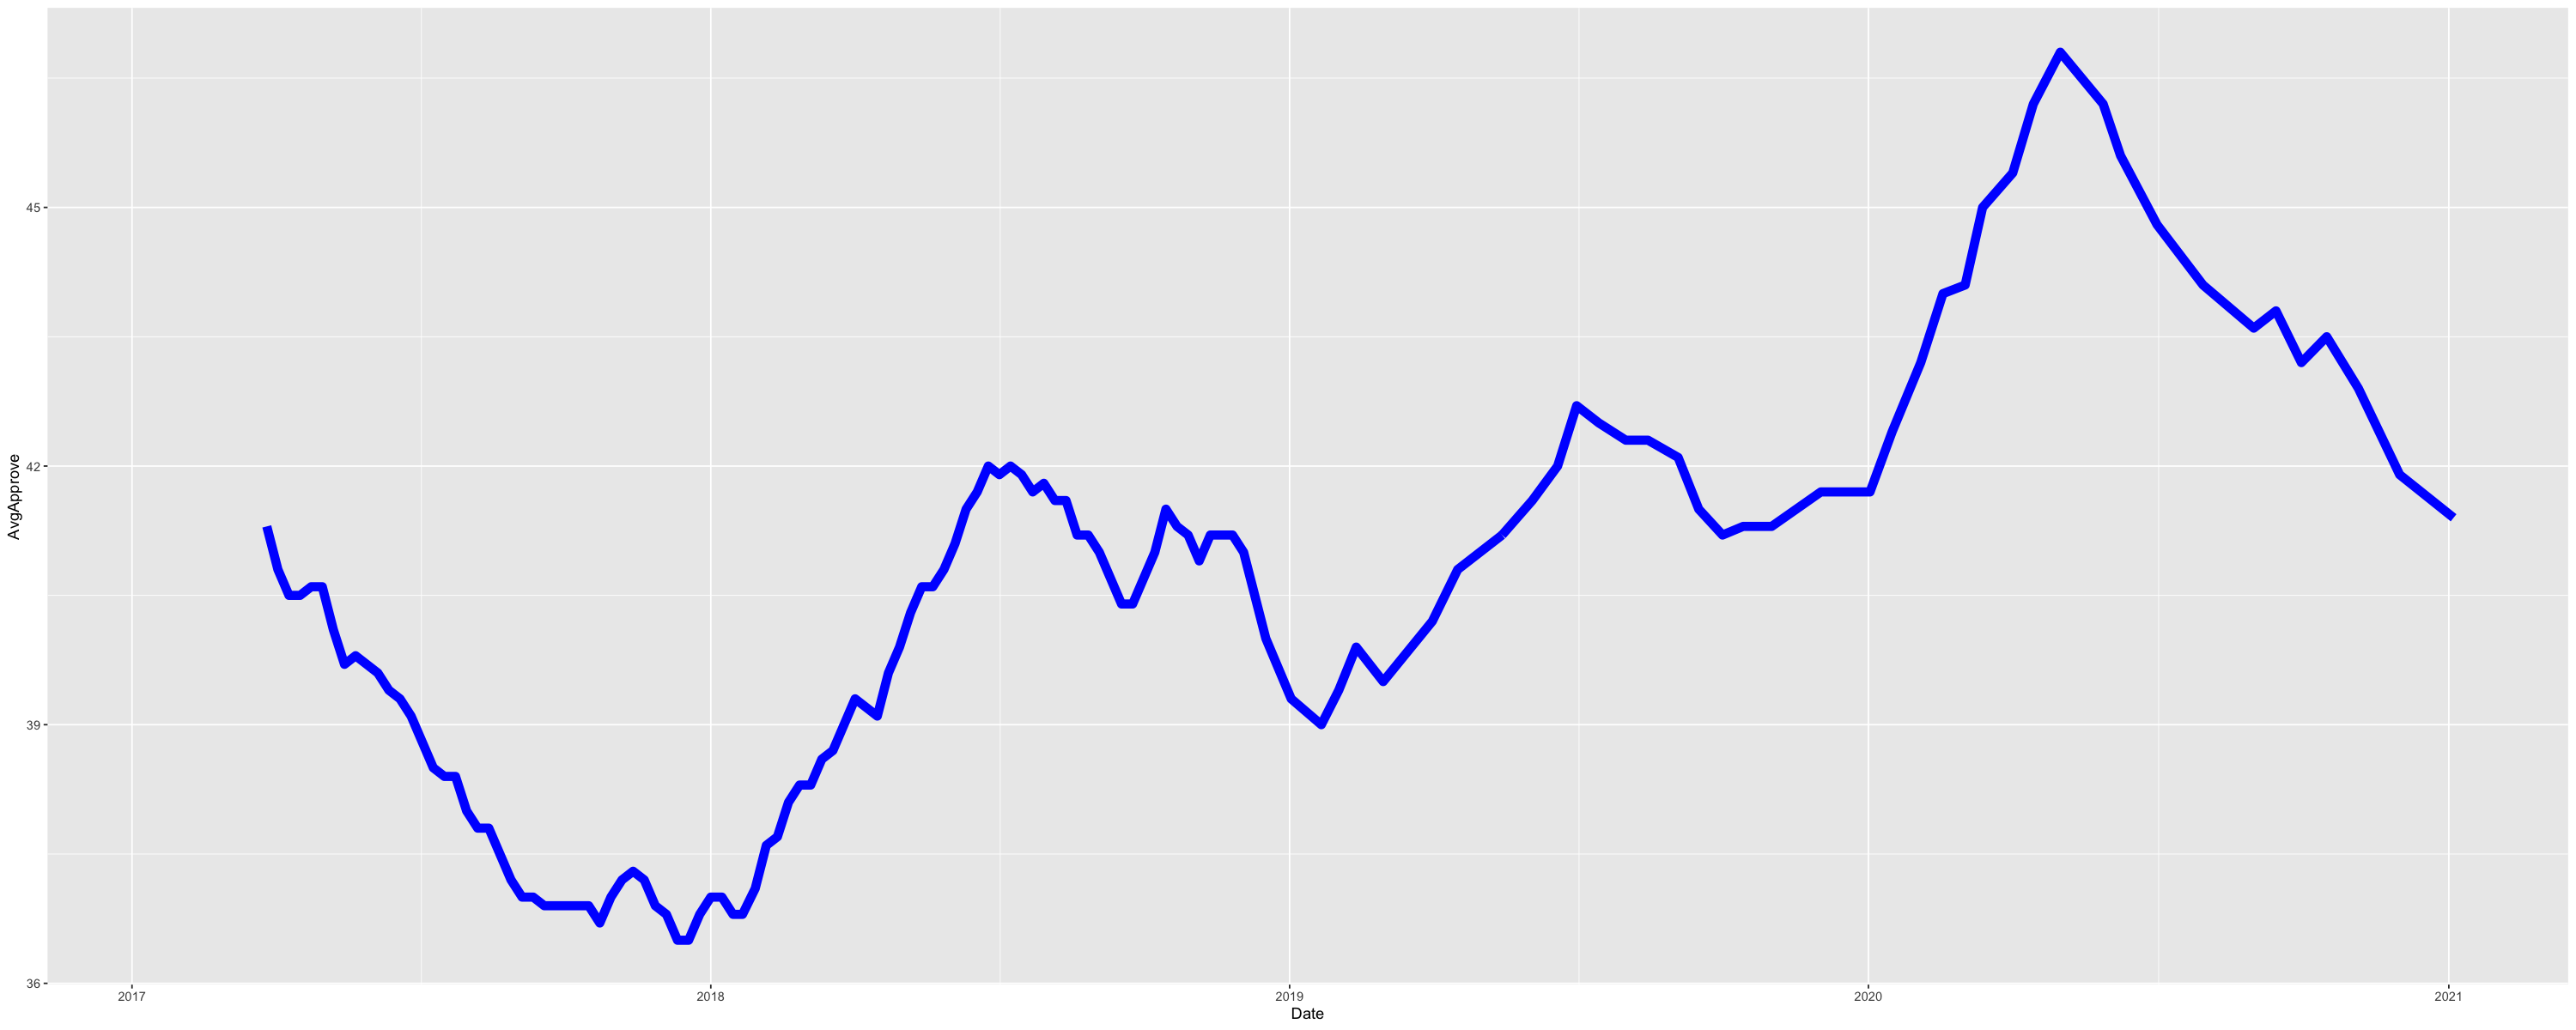

In [281]:
ggplot(data = TrumpApprove, aes(x=Date,y=AvgApprove)) + 
  geom_line(colour="blue", size=3)

---

# Down to Business;

In [282]:
#What data do we have?
glimpse(polls)

Rows: 1,305
Columns: 6
$ President     <chr> "Barack Obama", "Barack Obama", "Barack Obama", "Barack…
$ Date          <date> 2017-01-16, 2017-01-09, 2017-01-02, 2016-12-26, 2016-1…
$ EndDate       <chr> "19/01/2017", "15/01/2017", "08/01/2017", "01/01/2017",…
$ Approve       <int> 59, 57, 55, 55, 56, 56, 57, 54, 56, 56, 57, 53, 54, 55,…
$ Disapprove    <int> 37, 39, 42, 40, 40, 40, 40, 43, 40, 41, 41, 45, 44, 42,…
$ Unsure.NoData <int> 4, 4, 3, 5, 4, 4, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 4…


### Add A New Column 'Inaugurated' to Dataframe; Initialise it with Date

In [283]:
#Initialise Date to 1st Jan 1970
polls$Inaugurated <- ymd("1970-01-01")
head(polls$Inaugurated)

[1] "1970-01-01" "1970-01-01" "1970-01-01" "1970-01-01" "1970-01-01"
[6] "1970-01-01"

In [284]:
#List Our Presidents
distinctPresidents <- polls %>% distinct(President) %>% select(President)
head(distinctPresidents)

,President
,<chr>
1,Barack Obama
2,Ronald Reagan
3,George Bush
4,William J. Clinton
5,George W. Bush
6,Donald Trump


### Input correct Inauguration Dates per President

In [285]:
#Donald Trump
polls$Inaugurated[polls$President == "Donald Trump"] <- ymd("2017-01-20")

#Barrack Obama
polls$Inaugurated[polls$President == "Barack Obama"] <- ymd("2009-01-20")
                                                         
#George W. Bush
polls$Inaugurated[polls$President == "George W. Bush"] <- ymd("2001-01-20")
                                                           
#William J. Clinton
polls$Inaugurated[polls$President == "William J. Clinton"] <- ymd("1993-01-20")
                                                               
#George HW Bush
polls$Inaugurated[polls$President == "George Bush"] <- ymd("1989-01-20")
                                                               
#Ronald Reagan
polls$Inaugurated[polls$President == "Ronald Reagan"] <- ymd("1981-01-20")

# Assess Outputs
glimpse(unique(polls$Inaugurated[polls$President == "Ronald Reagan"]))

 Date[1:1], format: "1981-01-20"


### Track the Day Differential Between a Poll Start Date and the Presidents Time in Office

In [286]:
# Poll Start Date - Date of Inauguration = Number of Days after Inauguration Poll was commissioned.
polls$Days <- polls$Date - polls$Inaugurated 

## To compute moving averages:
 * sort the data by date. 
 * Then  take the mean of all the previous data within a certain window — say, 10 polls. 
 * Then, do the same for every observation  between starting day x and end day y. 

* The zoo package provides the rollmean() function, which iterates over every row in your data and averages the last x observations of variable y. 

### In this case, the rollmean() function would take an average of the president's approval for every previous x, polls. 
We specify:
* The variable we want, in this case, named Approve. 
* The number of observations to average, 
* whether or not to fill the rows between one and x variables with NA,
* whether or not we should average "up" or "down" the data frame.



## Calculate the Rolling Average of Approval per Every 10 Polls

In [287]:
PresidentialApproval <-polls %>%
    arrange(Date) %>%
    mutate(AvgApprove = rollmean(Approve, 10, fill = NA, align="right"))

tail(PresidentialApproval)


,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
,<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
1300,Donald Trump,2020-09-14,28/09/2020,46,52,2,2017-01-20,1333 days,43.8
1301,Donald Trump,2020-09-30,15/10/2020,43,55,2,2017-01-20,1349 days,43.2
1302,Donald Trump,2020-10-16,27/10/2020,46,52,2,2017-01-20,1365 days,43.5
1303,Donald Trump,2020-11-05,19/11/2020,43,55,2,2017-01-20,1385 days,42.9
1304,Donald Trump,2020-12-01,17/12/2020,39,57,4,2017-01-20,1411 days,41.9
1305,Donald Trump,2021-01-04,15/01/2021,34,62,4,2017-01-20,1445 days,41.4


## Observation Poll Data Includes Data outside of Terms 
Poll data exists before Candidate took Office -> Exclude this!

In [288]:
# Illustrate the problem rows:
head(PresidentialApproval %>% arrange(Days))

# Subset & Return Valid Polls
PresidentialApproval <- subset(PresidentialApproval, Days >= 0)

# Check for Problem removal
head(PresidentialApproval %>% arrange(Days))

,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
,<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
1,Barack Obama,2009-01-19,25/01/2009,67,13,20,2009-01-20,-1 days,32.5
2,Donald Trump,2017-01-20,29/01/2017,45,47,8,2017-01-20,0 days,55.0
3,George Bush,1989-01-24,26/01/1989,51,6,43,1989-01-20,4 days,53.3
4,William J. Clinton,1993-01-24,26/01/1993,58,20,22,1993-01-20,4 days,43.6
5,Barack Obama,2009-01-26,01/02/2009,66,18,16,2009-01-20,6 days,36.6
6,William J. Clinton,1993-01-29,31/01/1993,54,30,16,1993-01-20,9 days,45.1


,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
,<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
1,Donald Trump,2017-01-20,29/01/2017,45,47,8,2017-01-20,0 days,55.0
2,George Bush,1989-01-24,26/01/1989,51,6,43,1989-01-20,4 days,53.3
3,William J. Clinton,1993-01-24,26/01/1993,58,20,22,1993-01-20,4 days,43.6
4,Barack Obama,2009-01-26,01/02/2009,66,18,16,2009-01-20,6 days,36.6
5,William J. Clinton,1993-01-29,31/01/1993,54,30,16,1993-01-20,9 days,45.1
6,Ronald Reagan,1981-01-30,02/02/1981,51,13,36,1981-01-20,10 days,NA


### Remove Initial "NA" Rows used in Calculating Rolling Mean

In [289]:
# Illustrate the problem rows: (AvgApprove is NA...)
head(subset(PresidentialApproval, Days = NA),9)

# Fix Problem
PresidentialApproval<-PresidentialApproval %>% drop_na(AvgApprove)

# & Check Solution
head(subset(PresidentialApproval, Days = NA),9)

,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
,<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
1,Ronald Reagan,1981-01-30,02/02/1981,51,13,36,1981-01-20,10 days,NA
2,Ronald Reagan,1981-02-13,16/02/1981,55,18,27,1981-01-20,24 days,NA
3,Ronald Reagan,1981-03-13,16/03/1981,60,24,16,1981-01-20,52 days,NA
4,Ronald Reagan,1981-04-03,06/04/1981,67,18,15,1981-01-20,73 days,NA
5,Ronald Reagan,1981-04-10,13/04/1981,67,19,14,1981-01-20,80 days,NA
6,Ronald Reagan,1981-05-08,11/05/1981,68,21,11,1981-01-20,108 days,NA
7,Ronald Reagan,1981-06-05,08/06/1981,59,28,13,1981-01-20,136 days,NA
8,Ronald Reagan,1981-06-19,22/06/1981,59,29,12,1981-01-20,150 days,NA
9,Ronald Reagan,1981-06-26,29/06/1981,58,30,12,1981-01-20,157 days,NA


,President,Date,EndDate,Approve,Disapprove,Unsure.NoData,Inaugurated,Days,AvgApprove
,<chr>,<date>,<chr>,<int>,<int>,<int>,<date>,<drtn>,<dbl>
10,Ronald Reagan,1981-07-17,20/07/1981,60,29,11,1981-01-20,178 days,60.4
11,Ronald Reagan,1981-07-24,27/07/1981,56,30,14,1981-01-20,185 days,60.9
12,Ronald Reagan,1981-07-31,03/08/1981,60,28,12,1981-01-20,192 days,61.4
13,Ronald Reagan,1981-08-14,17/08/1981,60,29,11,1981-01-20,206 days,61.4
14,Ronald Reagan,1981-09-18,21/09/1981,52,37,11,1981-01-20,241 days,59.9
15,Ronald Reagan,1981-10-02,05/10/1981,56,35,9,1981-01-20,255 days,58.8
16,Ronald Reagan,1981-10-30,02/11/1981,53,35,12,1981-01-20,283 days,57.3
17,Ronald Reagan,1981-11-13,16/11/1981,49,40,11,1981-01-20,297 days,56.3
18,Ronald Reagan,1981-11-20,23/11/1981,54,37,9,1981-01-20,304 days,55.8


## Create Plot: Presidential Approval As One Merged Lineplot (Not Segregated By President)


In [290]:
SinglelineChart <- PresidentialApproval %>%
    ggplot(aes(x=Date,y=AvgApprove, colour=President)) + 
    geom_line(size=7.5, colour="black", alpha=0.2)+ 
    geom_line(size=5)+ 
    scale_color_viridis(discrete = TRUE, option="magma")+
    theme_bw()+my_Theme+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    theme_bw()+my_Theme+
    labs(x = " ", y="Approval Rating",
        title="Approval in the Office of Presiden - Over the last ~40 Years",
        subtitle="Below is a Trendline Visualisation of Voter Approval in the various Holders of Presidential Office;\nIllustrating High Points and Low Points in One Digestsible Graph.",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")
    

## Create Plot: Multiline Overlay Presidential Approval 

In [291]:
MultilineChart <- PresidentialApproval %>%
    ggplot(aes(x=Days,y=AvgApprove, colour=President)) + 
    geom_line(size=2)+
    scale_color_viridis(discrete = TRUE, option="plasma")+
    scale_x_continuous(breaks=seq(0,3000,250))+
    annotate("rect", xmin=0, xmax=5, ymin=30, ymax=85, alpha=0.5, fill="black")+
    annotate("rect", xmin=(1461-10), xmax=(1461), ymin=30, ymax=85, alpha=0.5, fill="red")+
    annotate("rect", xmin=2917, xmax=2922, ymin=30, ymax=85, alpha=0.5, fill="black")+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    annotate("text", x = 1461+25, y = 75, size=8, angle=-90, alpha=0.75, label = c("Re-Election Point"))+
    annotate("segment", x = 1700, xend = 1461+20, y = 30, yend = 40, colour = "red", size=3, alpha=0.8, arrow=arrow())+
    annotate("text", x = 1725, y = 30, size=8, alpha=0.75, label = c("Trump & GHW Bush Out"))+
    theme_bw()+my_Theme+
    labs(x = "Timeline of Presidency [Days]", y="Approval Rating",
        title="President Approval Ratings",
        subtitle="The chart below represents the Rolling Average of Poll Data\nover the period of Time in Office of the last six Sitting Presidents",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")

## Create Plot: Facet Wrap; Hone in on Individual Presidential Approval

In [292]:
FacetWrapLineChart <- PresidentialApproval %>%
    ggplot(aes(x=Days,y=AvgApprove, colour=President)) + 
    geom_line(size=7.5, colour="black", alpha=0.2)+ 
    geom_line(size=3)+
    scale_x_continuous(breaks=seq(0,3000,500))+
    facet_wrap(~President)+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    scale_color_viridis(discrete = TRUE, option="inferno")+
    theme_bw()+my_Theme+
    labs(x = "Timeline of Presidency [Days]", y="Approval Rating",
        title="Facet Wrap: Segregated President Approval Ratings",
        subtitle="",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")

## Isolate My Key Line Plot: Who Was Mr. Unpopular?! 😂

In [293]:
# Filter Presidents By Approval Rating.... 
# Trivia: Who is the Only President in the Last 40 years to "achieve" a sub 30 Rolling Average Approval Rating during their term(s) in office? 😂
 
PresidentialApproval_filtered <- PresidentialApproval %>%
  group_by(President) %>% 
  filter(min(AvgApprove) < 30) %>%
  ungroup()

In [294]:
WeakestPresident <- ggplot() +
    # Draw Unfiltered Data in Grey
    geom_line(aes(x=Date,y=AvgApprove, colour=President, size=5), data = PresidentialApproval, colour = alpha("grey", 0.7)) +
    # Highlight Our Key Line: George W Bush  
    geom_line(aes(x=Date,y=AvgApprove, colour=President, size=5), data = PresidentialApproval_filtered)+
    annotate("pointrange", x = as.Date("2008-12-31"), y = 28, ymin = 20, ymax = 70, colour = alpha("red",0.7), size = 2.5) +
    annotate("segment", x = as.Date("2001-12-31"), xend = as.Date("2008-12-31"), y = 88, yend = 28, size=3,colour = "blue")+
    guides(color = guide_legend(override.aes = list(size = 20)))+
    scale_color_viridis(discrete = TRUE)+
    guides(size = FALSE)+
    theme_bw()+my_Theme+
    labs(x = " ", y="Approval Rating",
        title="Name & Shame: Who Hit the Lowest President Approval Ratings",
        subtitle="George W Bush: I guess a Financial Crisis & an Incoming Barrack Obama will do that to your numbers! ",
        caption="R Dataset Source: [Presidential Approval Poll Data] © Stephen Alger 2021")



## Our Data Wrangled Output:
Using the 'cowplot' R module

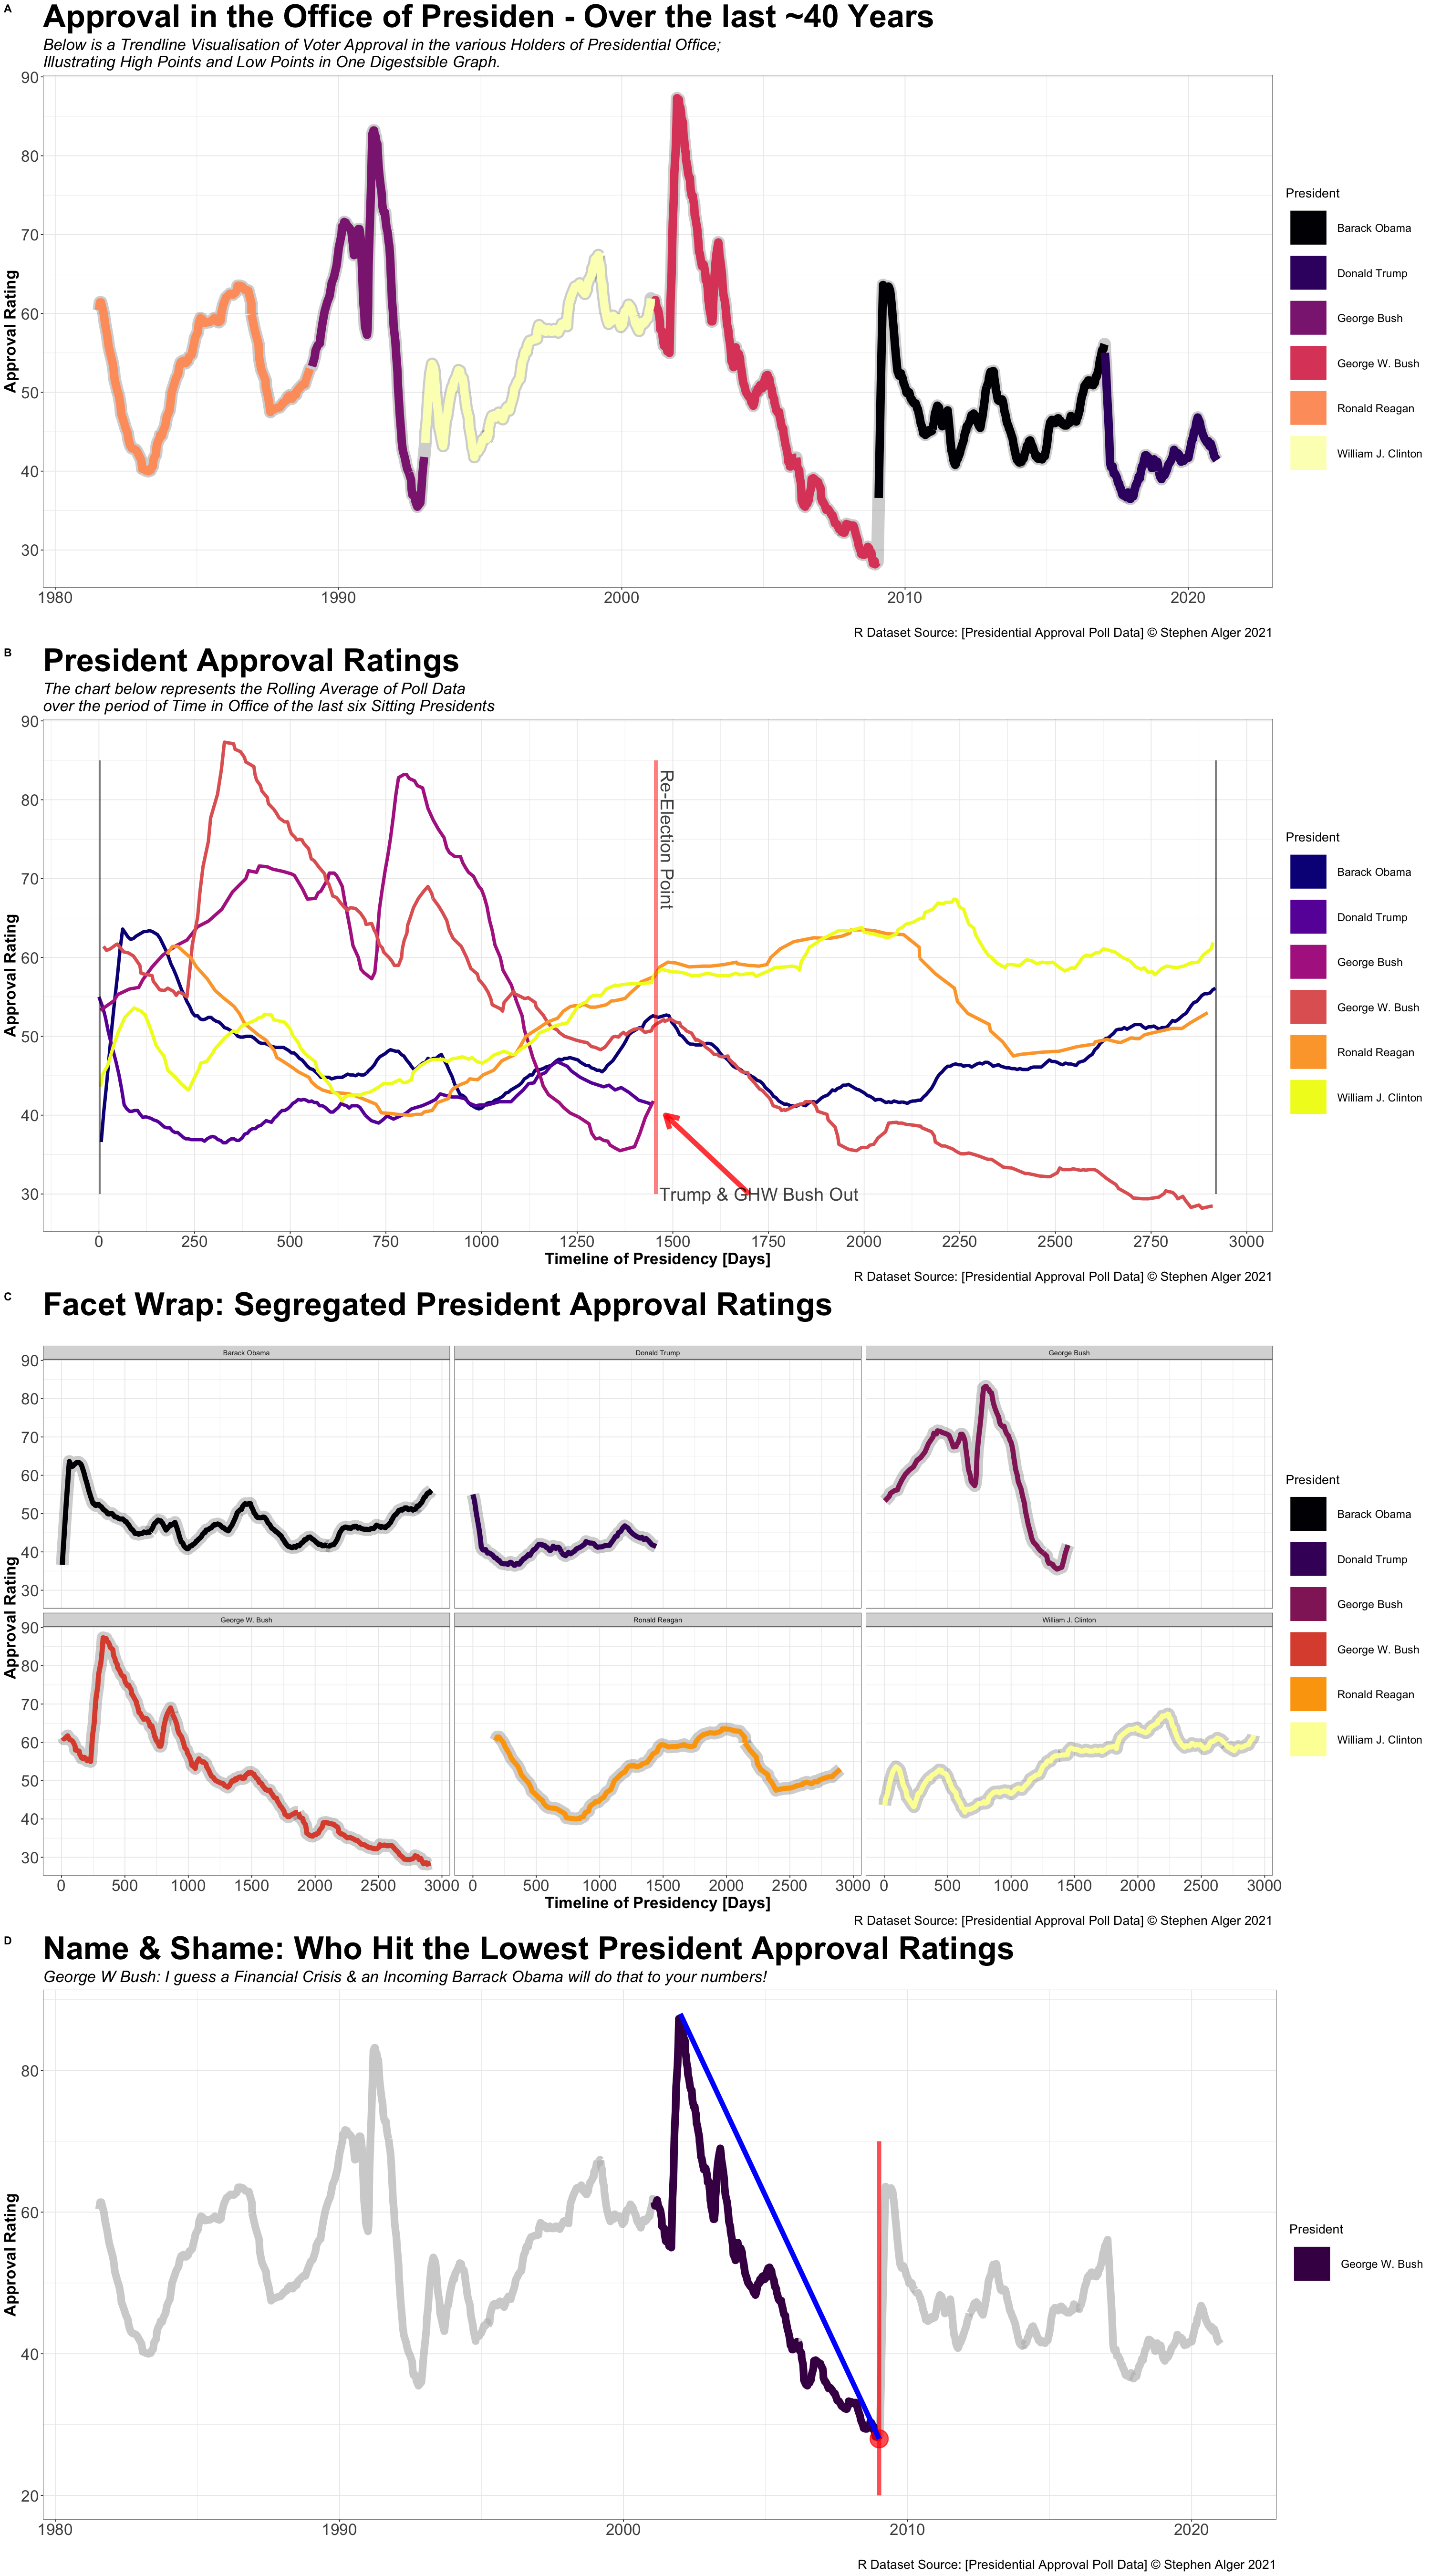

In [295]:
options(repr.plot.width=25, repr.plot.height=45)
plot_grid(SinglelineChart, MultilineChart, FacetWrapLineChart,WeakestPresident, labels = "AUTO", ncol = 1)